# Clustering

#### Clustering data based on similarities

In [42]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [43]:
df = pd.read_excel('cars.xls')

#### Remember This :

* Regression; R2 - RMSE

* Classification; Accuracy, F1 Score , Classification Report, Confusion Matrix

* Clutering; Silhouette Score

In [44]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [45]:
x = df[['Price', 'Mileage', 'Cylinder']]

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [47]:
model = KMeans(n_clusters=4)

In [48]:
model = model.fit(x)

In [49]:
pred = model.predict(x)

In [50]:
x['Cluster'] = pred

In [51]:
x.head()

,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,3
1,17542.036083,9135,6,3
2,16218.847862,13196,6,3
3,16336.913140,16342,6,3
4,16339.170324,19832,6,0


In [52]:
silhouette_score(x, pred)

0.41168878948395854

In [53]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

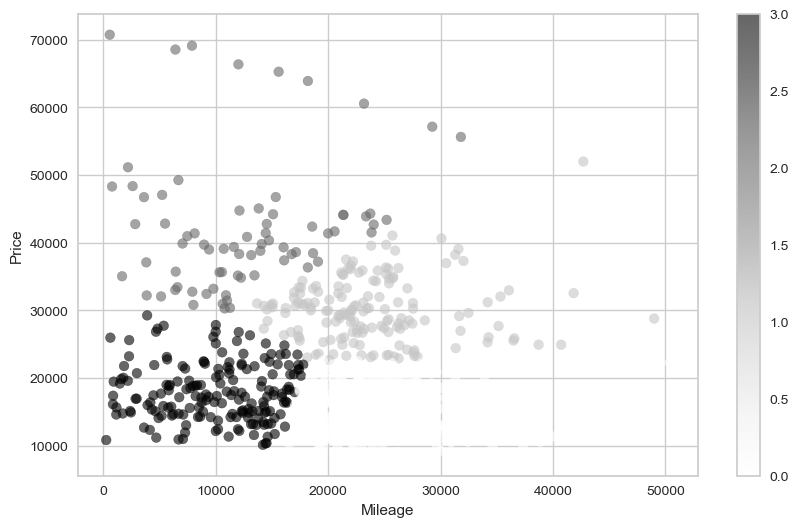

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x.Mileage, x.Price, c=pred, alpha=0.6)
plt.colorbar()
plt.xlabel('Mileage')
plt.ylabel('Price')

In [55]:
# wcss = within cluster sum of squares
wcss = []
ss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(x)
    pred = kmeans.predict(x)
    wcss.append(kmeans.inertia_)
    ss.append(silhouette_score(x, pred))

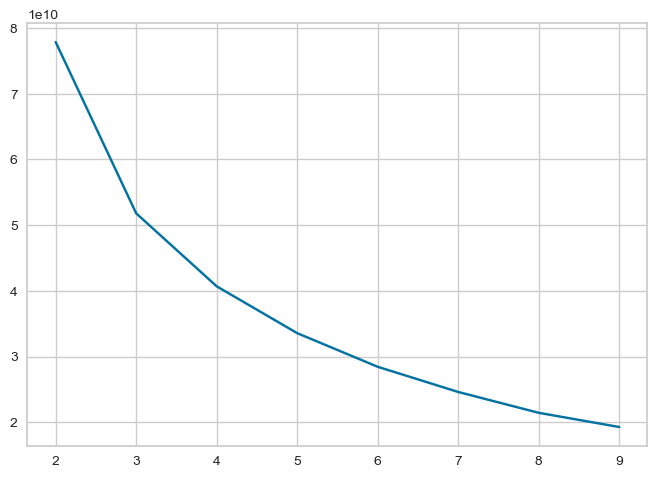

In [56]:
plt.plot(range(2, 10), wcss)

In [57]:
import seaborn as sns

<Axes: >

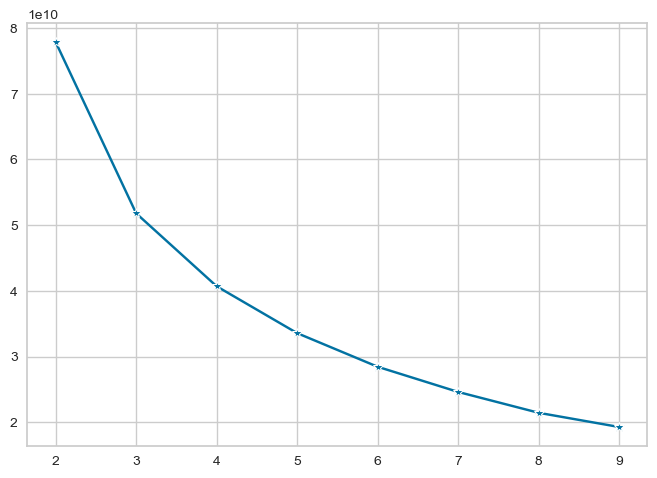

In [58]:
sns.lineplot(x=range(2, 10), y=wcss, marker='*')

In [59]:
#pip install yellowbrick

In [60]:
from yellowbrick.cluster import KElbowVisualizer

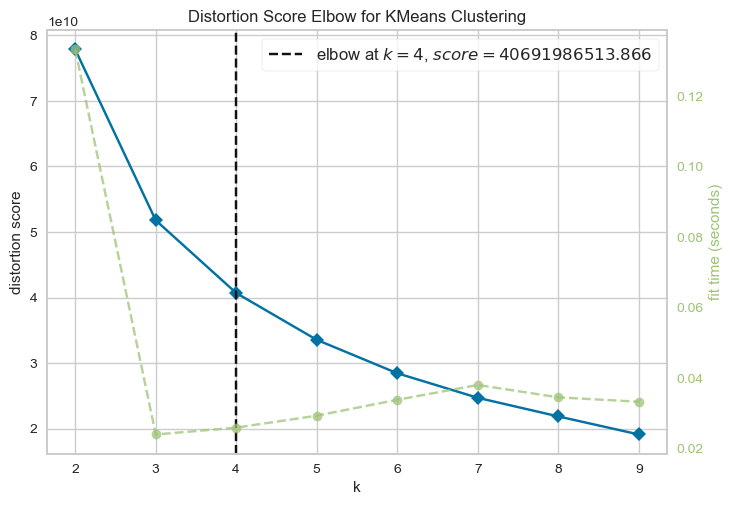

In [61]:
km = KMeans()
vis = KElbowVisualizer(km, k=(2, 10))
vis.fit(x)
vis.show();

In [62]:
# Hierachical Clustering

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [64]:
data = linkage(x, method='ward', metric='euclidean')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [25.0, 25.0, 56.25, 56.25],
  [10.0, 10.0, 40.625, 40.625],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [106.25, 106.25, 142.5, 142.5],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [172.5, 172.5, 217.5, 217.5],
  [124.375, 124.375, 195.0, 195.0],
  [25.3125, 25.3125, 159.6875, 159.6875],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [345.0, 34

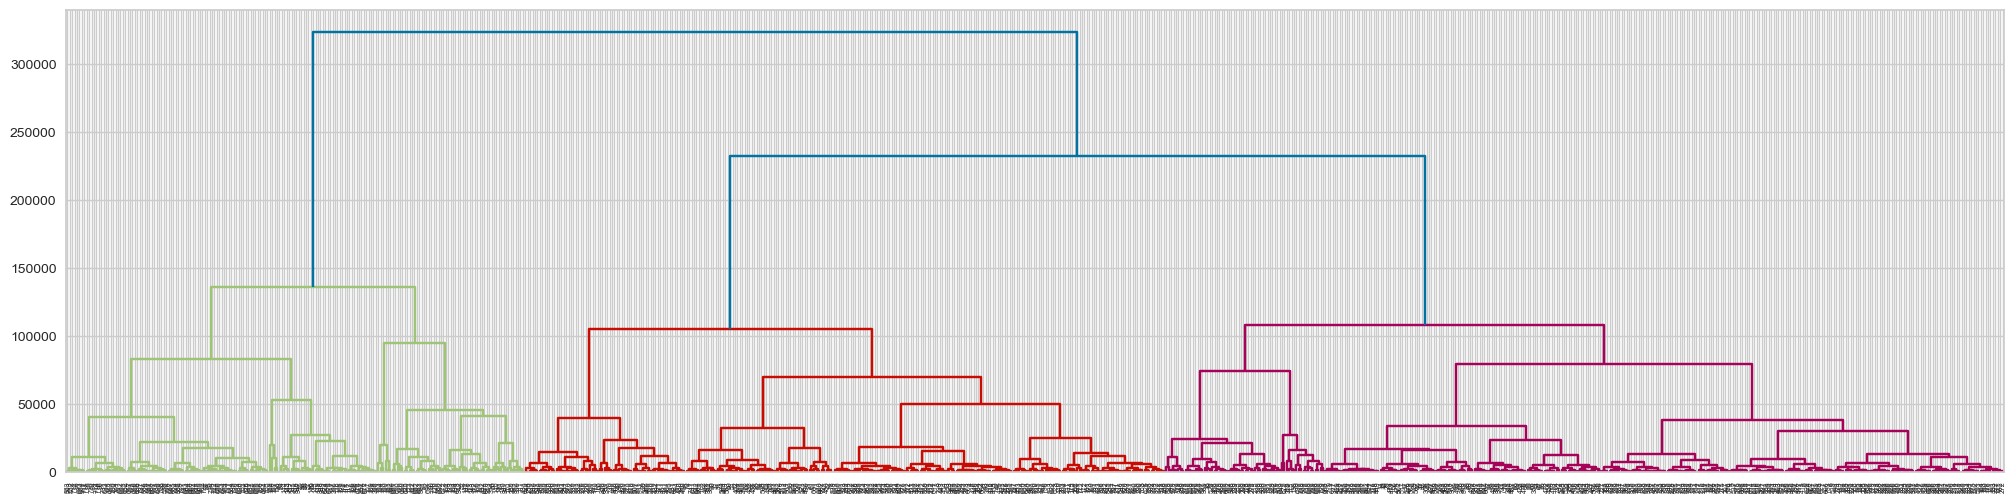

In [65]:
plt.figure(figsize=(25, 6))
dendrogram(data)

In [66]:

df = pd.read_csv('Billionaires.csv')

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,2640.0,1.289159e+03,7.396937e+02,1.000000,6.590000e+02,1.312000e+03,1.905000e+03,2.540000e+03
finalWorth,2640.0,4.623788e+03,9.834241e+03,1000.000000,1.500000e+03,2.300000e+03,4.200000e+03,2.110000e+05
age,2575.0,6.514019e+01,1.325810e+01,18.000000,5.600000e+01,6.500000e+01,7.500000e+01,1.010000e+02
birthYear,2564.0,1.957183e+03,1.328252e+01,1921.000000,1.948000e+03,1.957000e+03,1.966000e+03,2.004000e+03
birthMonth,2564.0,5.740250e+00,3.710085e+00,1.000000,2.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
birthDay,2564.0,1.209984e+01,9.918876e+00,1.000000,1.000000e+00,1.100000e+01,2.100000e+01,3.100000e+01
cpi_country,2456.0,1.277552e+02,2.645295e+01,99.550000,1.172400e+02,1.172400e+02,1.250800e+02,2.885700e+02
cpi_change_country,2456.0,4.364169e+00,3.623763e+00,-1.900000,1.700000e+00,2.900000e+00,7.500000e+00,5.350000e+01
gross_tertiary_education_enrollment,2458.0,6.722567e+01,2.134343e+01,4.000000,5.060000e+01,6.560000e+01,8.820000e+01,1.366000e+02
gross_primary_education_enrollment_country,2459.0,1.028585e+02,4.710977e+00,84.700000,1.002000e+02,1.018000e+02,1.026000e+02,1.421000e+02


In [68]:
df[df['personName'] == 'Jeff Bezos']      # finalWorth - age - cpi_country - cpi_change_country - life_expectancy_country - gross_tertiary_education_enrollment - gross_primary_education_enrollment_country - tax_revenue_country_country - total_tax_rate_country - population_country

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

<Axes: xlabel='selfMade', ylabel='count'>

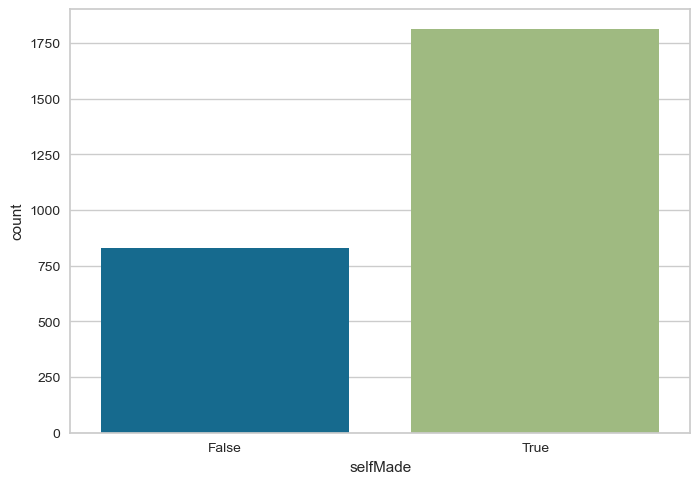

In [70]:
sns.countplot(x=df['selfMade'])

<Axes: xlabel='count', ylabel='country'>

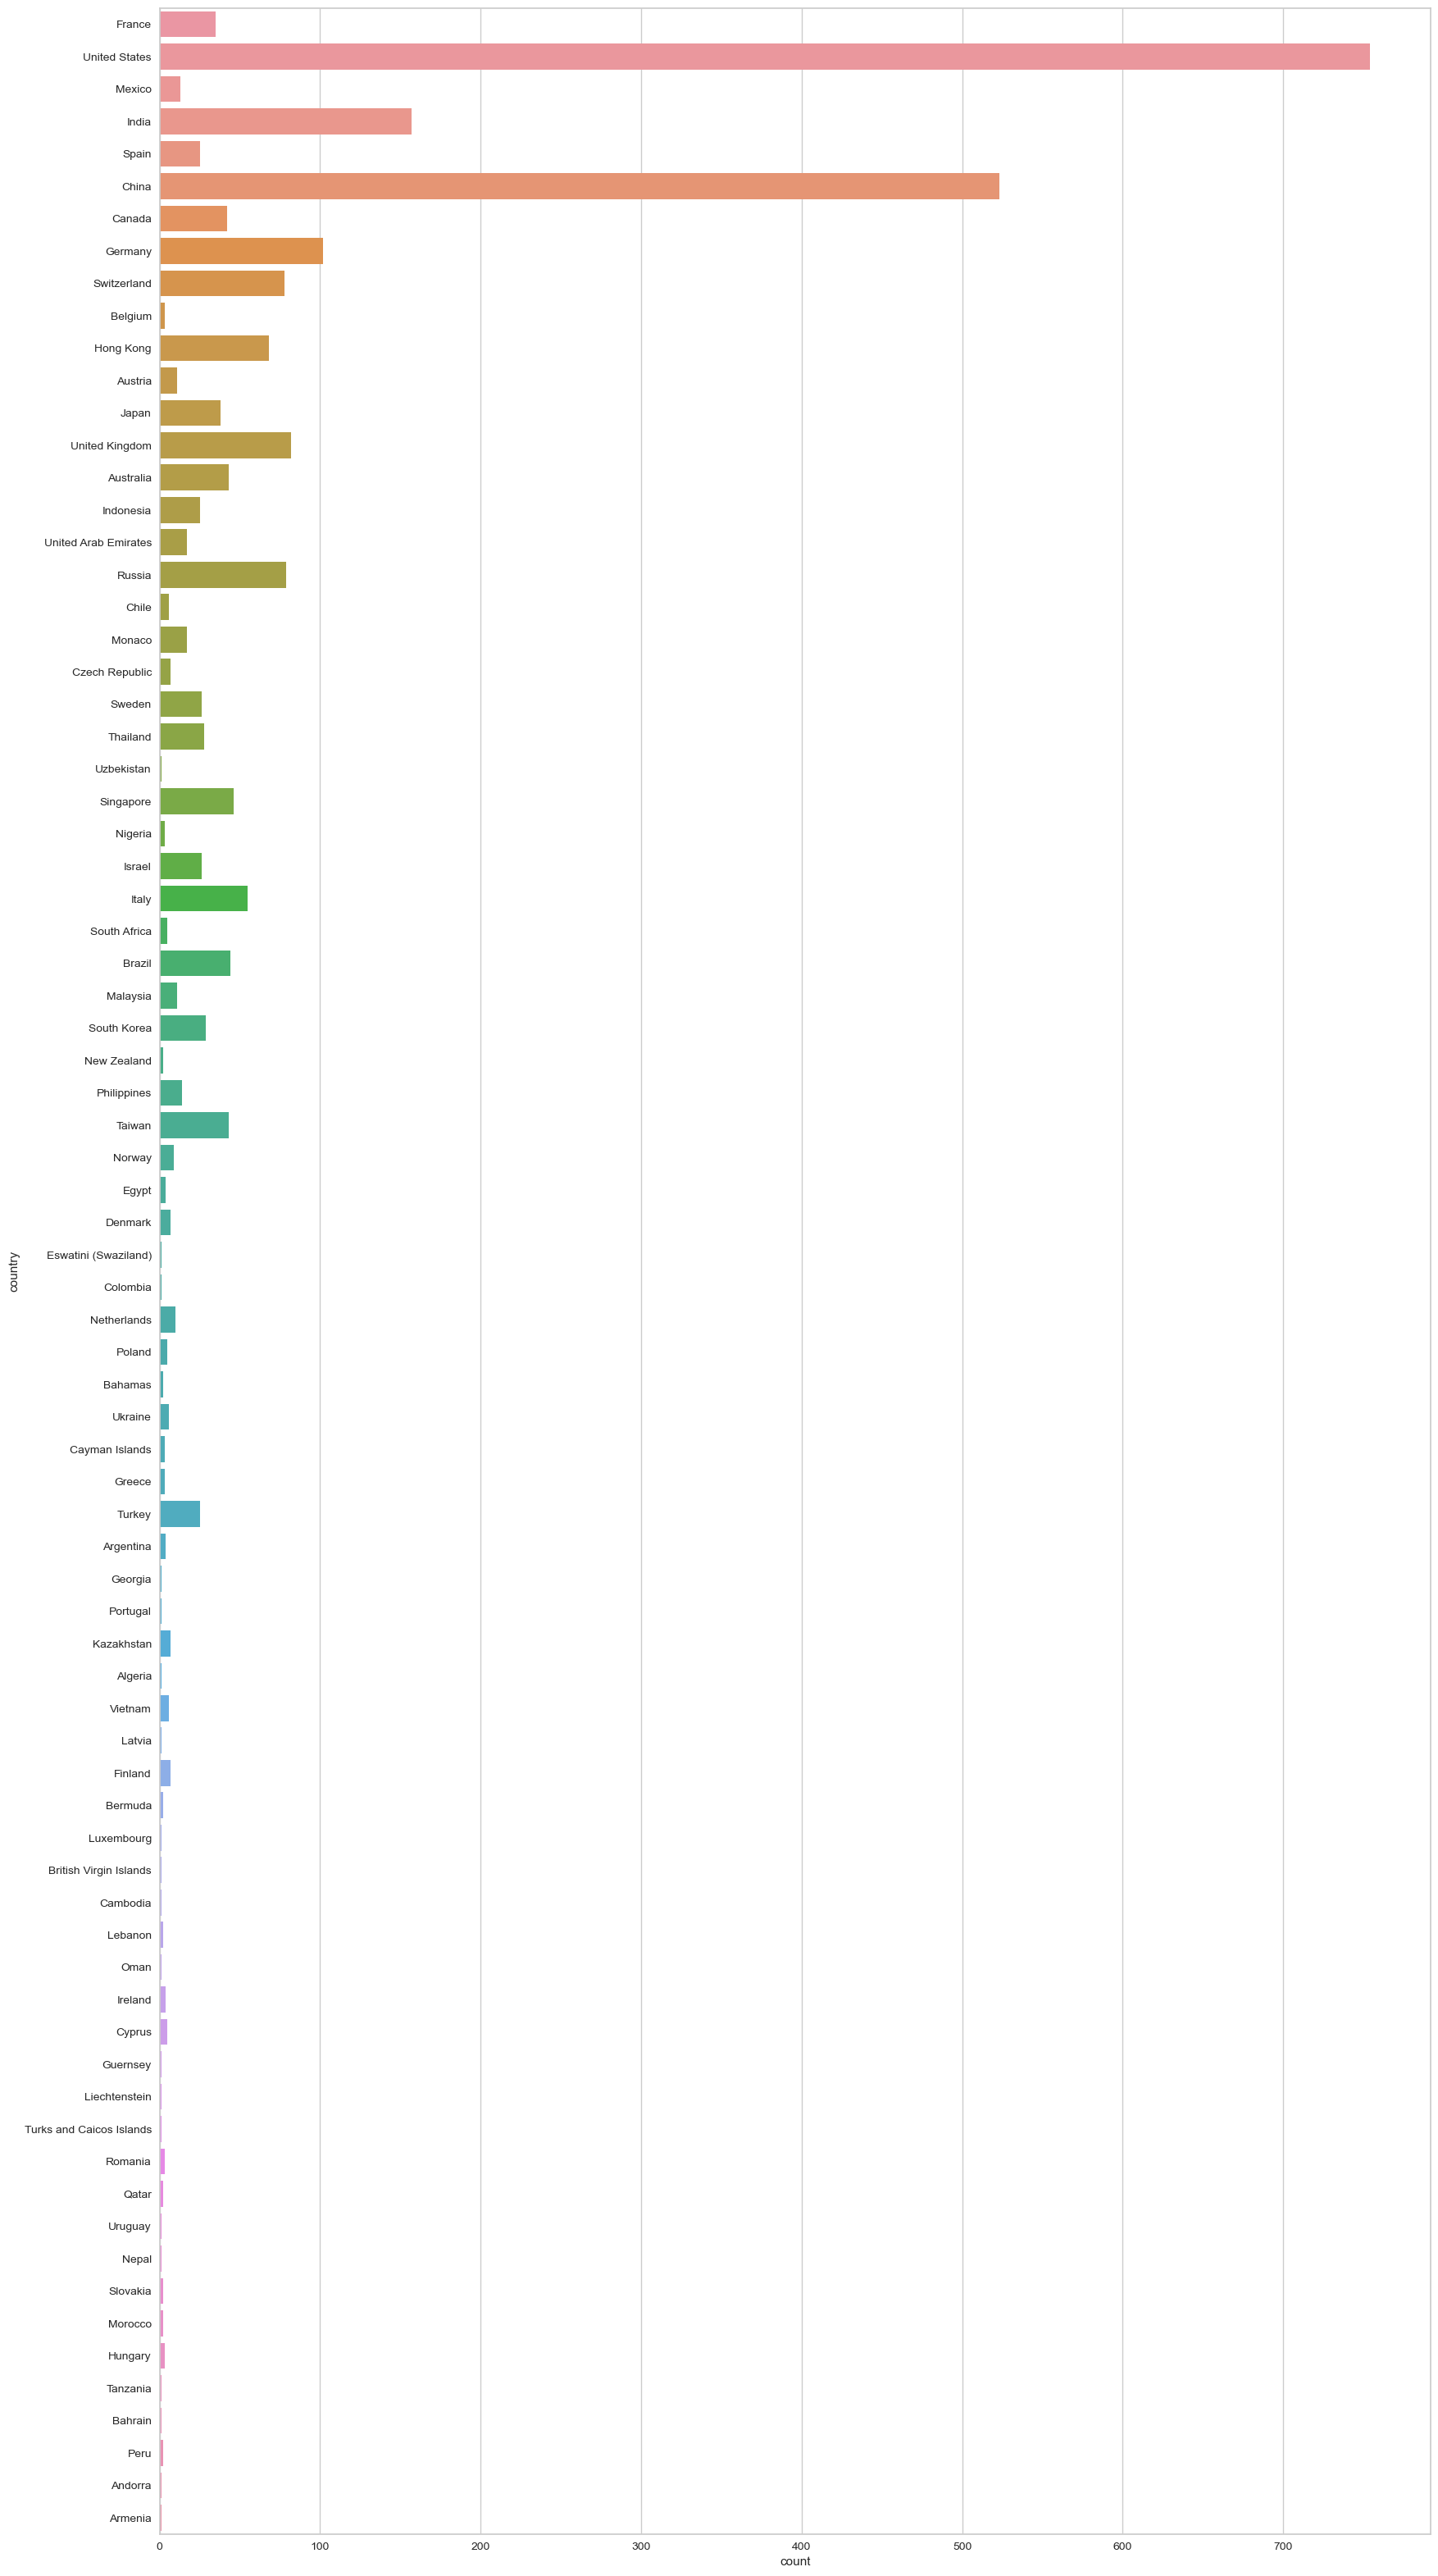

In [71]:
plt.figure(figsize=(20, 40))
sns.countplot(y=df['country'])


In [72]:
ydf = df['country'].value_counts().sort_values(ascending=False)

<Axes: xlabel='count', ylabel='country'>

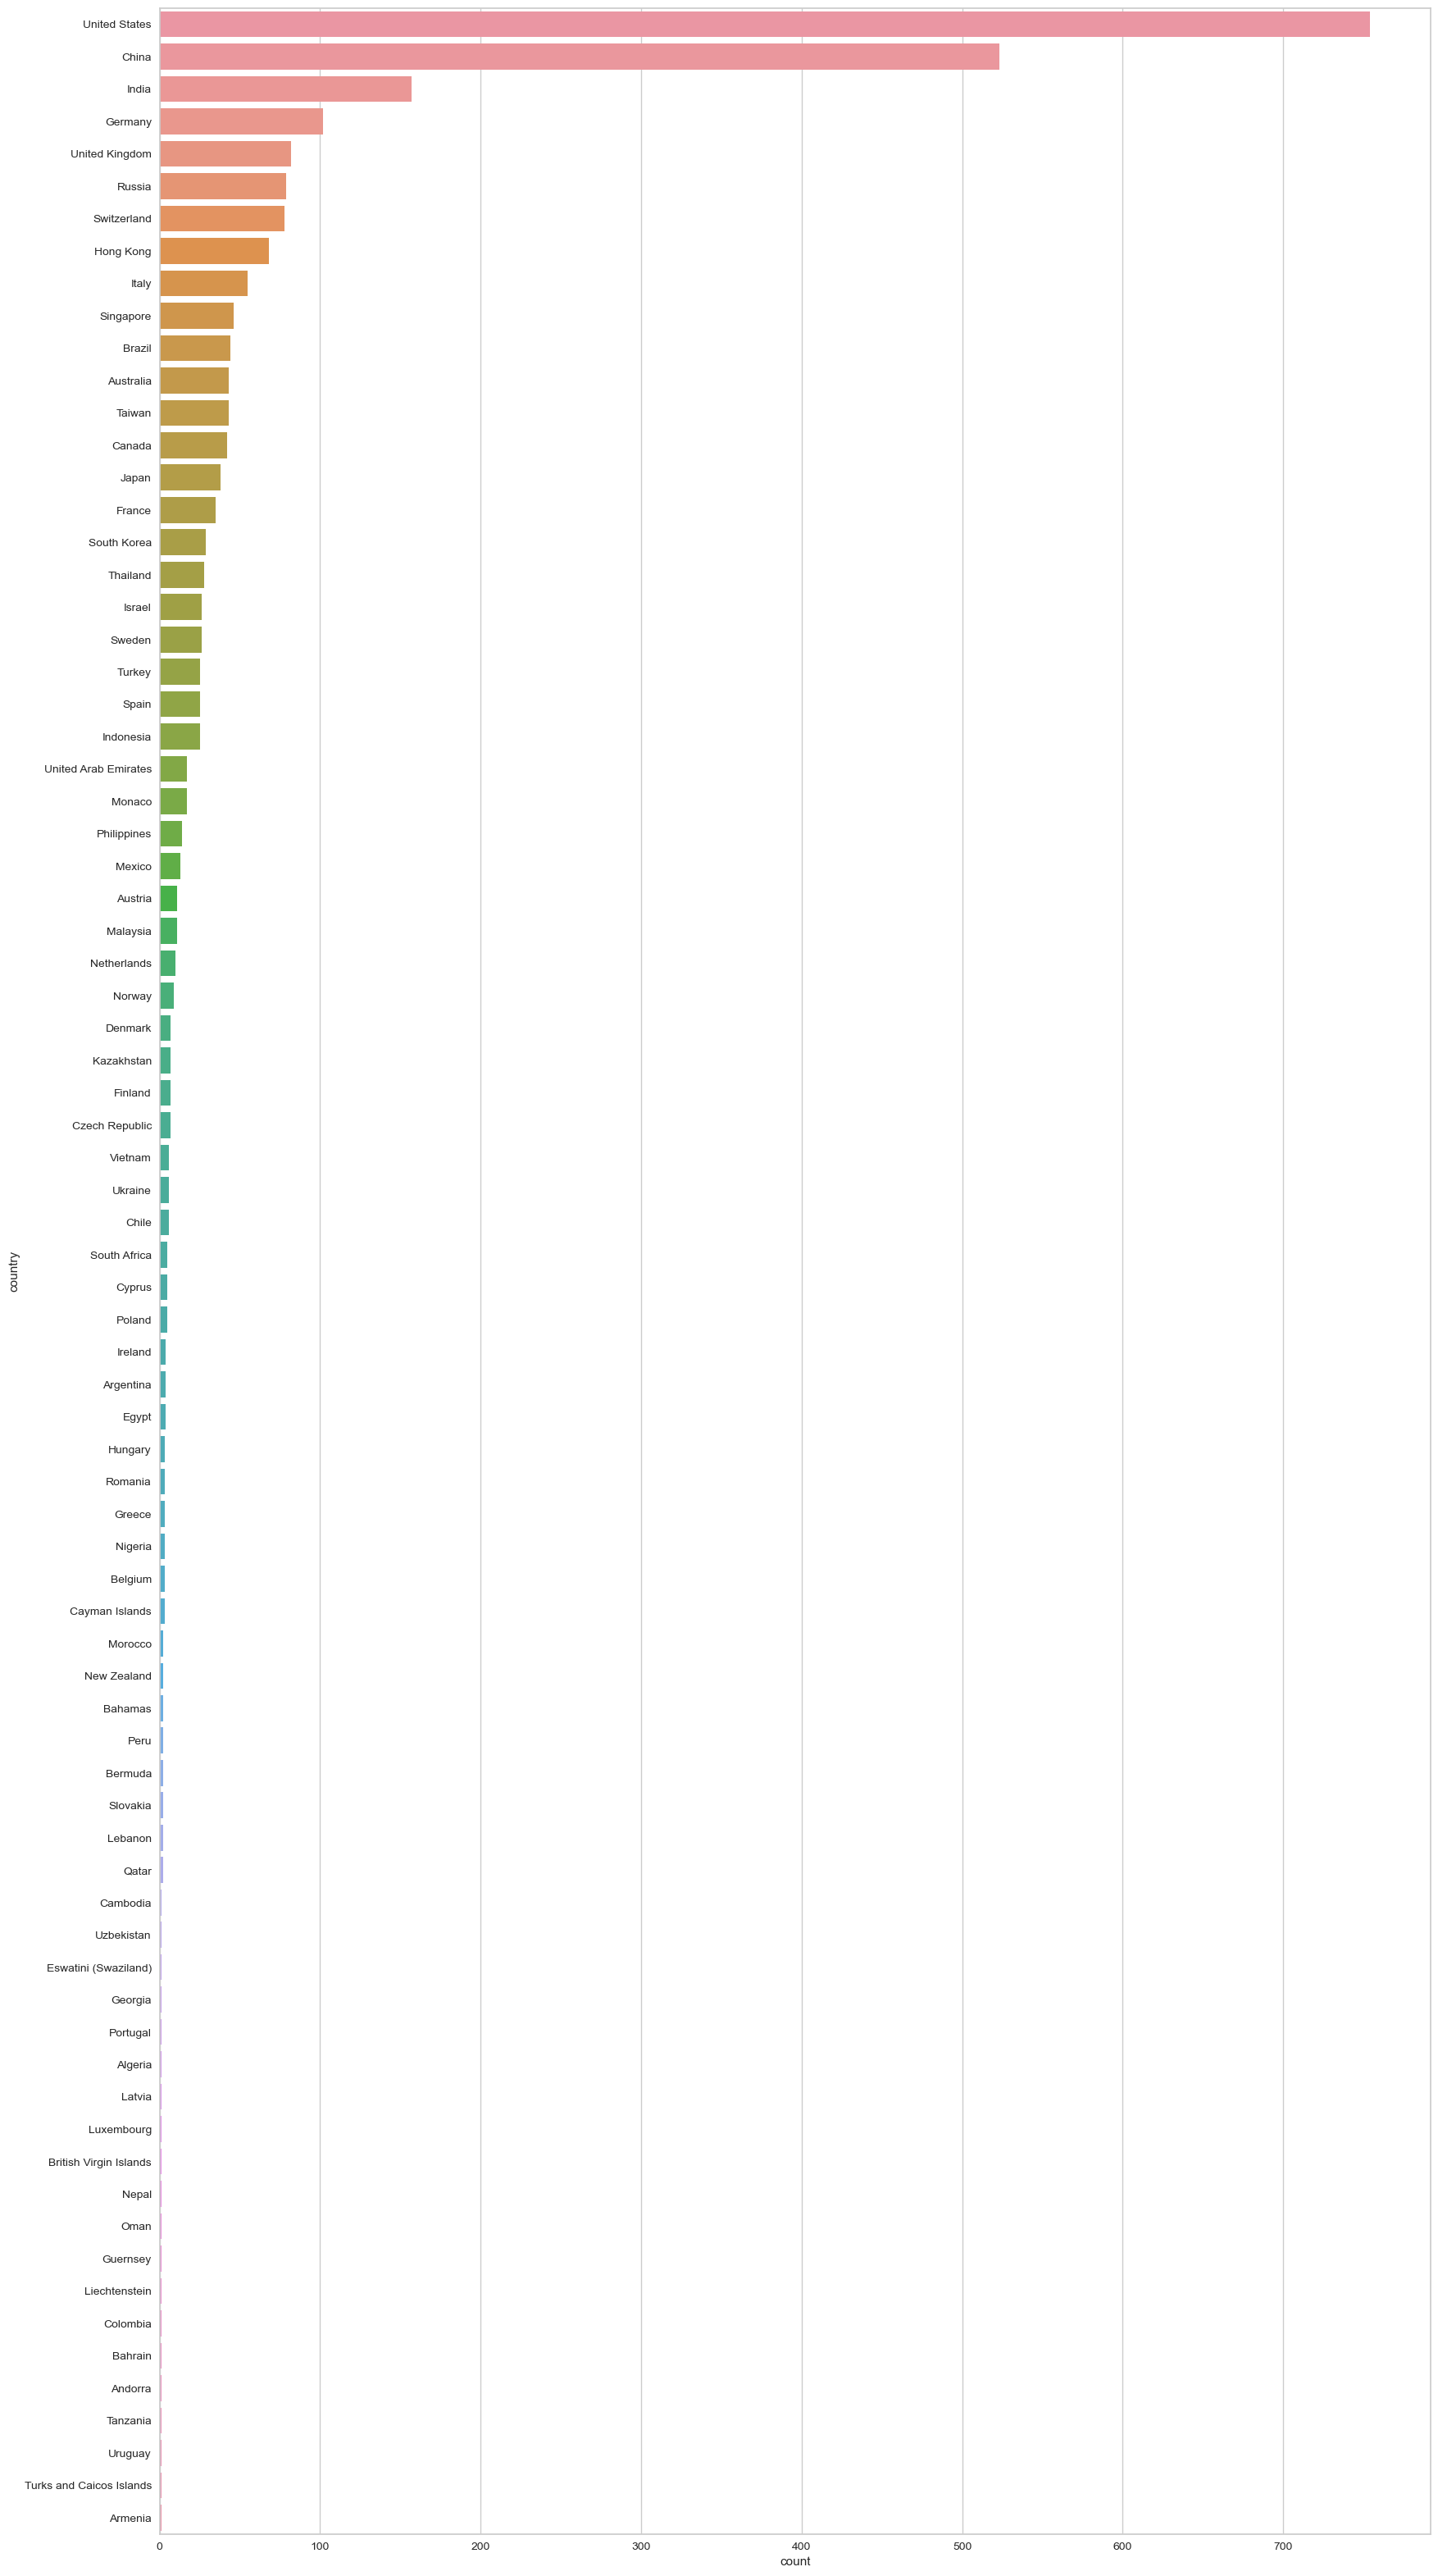

In [73]:
plt.figure(figsize=(20, 40))
sns.countplot(y=df['country'], order=ydf.index)

In [74]:
tr = df[df['country'] == 'Turkey']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Ibrahim Erdemoglu'),
  Text(1, 0, 'Murat Ulker'),
  Text(2, 0, 'Ali Erdemoglu'),
  Text(3, 0, 'Semahat Sevim Arsel'),
  Text(4, 0, 'Ipek Kirac'),
  Text(5, 0, 'Mustafa Rahmi Koc'),
  Text(6, 0, 'Saban Cemil Kazanci'),
  Text(7, 0, 'Ferit Faik Sahenk'),
  Text(8, 0, 'Erman Ilicak'),
  Text(9, 0, 'Filiz Sahenk'),
  Text(10, 0, 'Sezai Bacaksiz'),
  Text(11, 0, 'Bulent Eczacibasi'),
  Text(12, 0, 'Faruk Eczacibasi'),
  Text(13, 0, 'Mehmet Sinan Tara'),
  Text(14, 0, 'Nihat Ozdemir'),
  Text(15, 0, 'Mustafa Kucuk'),
  Text(16, 0, 'Hamdi Akin & family'),
  Text(17, 0, 'Ahmet Calik'),
  Text(18, 0, 'Aydin Dogan'),
  Text(19, 0, 'Deniz Sahenk'),
  Text(20, 0, 'Mehmet Aydinlar'),
  Text(21, 0, 'Sefik Yilmaz Dizdar'),
  Text(22, 0, 'Ali Metin Kazanci'),
  Text(23, 0, 'Turgay Ciner'),
  Text(24, 0, 'Murat Vargi')])

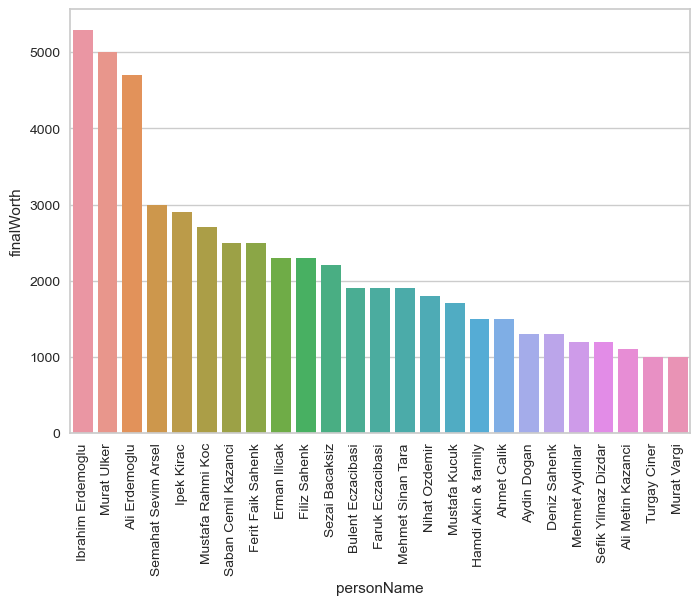

In [75]:
sns.barplot(x='personName', y='finalWorth', data=tr)
plt.xticks(rotation=90)

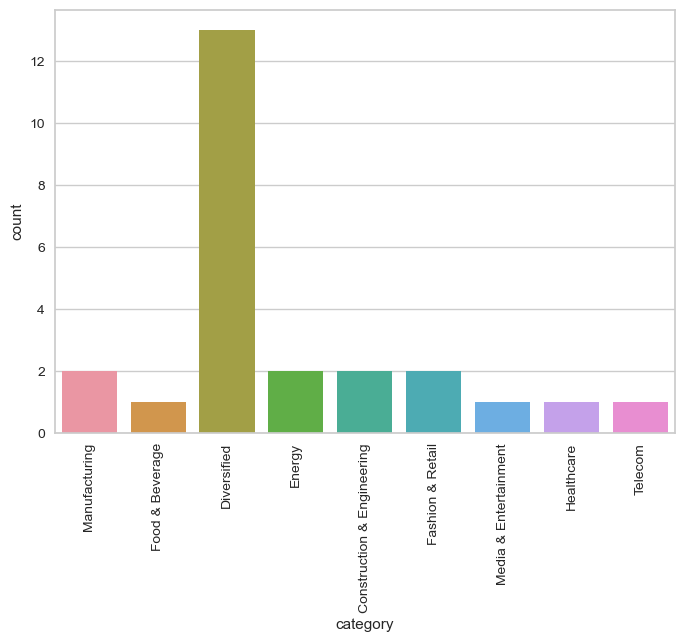

In [76]:
sns.countplot(x=tr['category'])
plt.xticks(rotation=90)
plt.show();

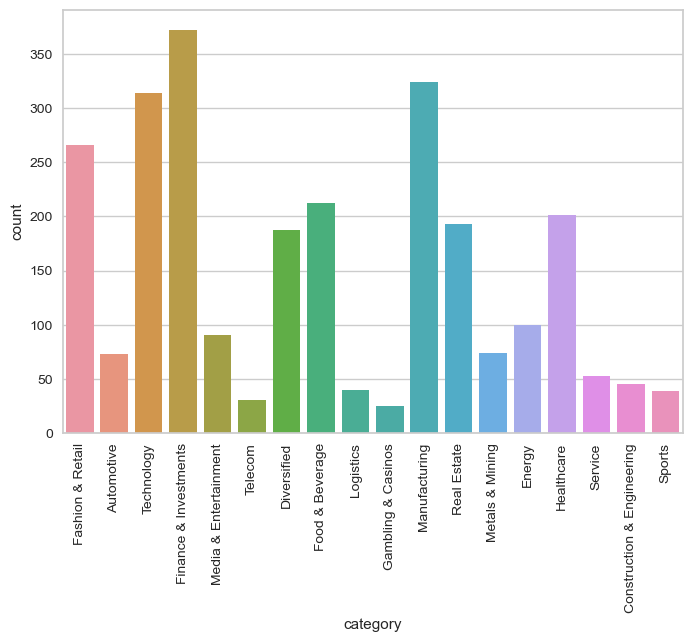

In [77]:
sns.countplot(x=df['category'])
plt.xticks(rotation=90)
plt.show();

<Axes: xlabel='selfMade', ylabel='count'>

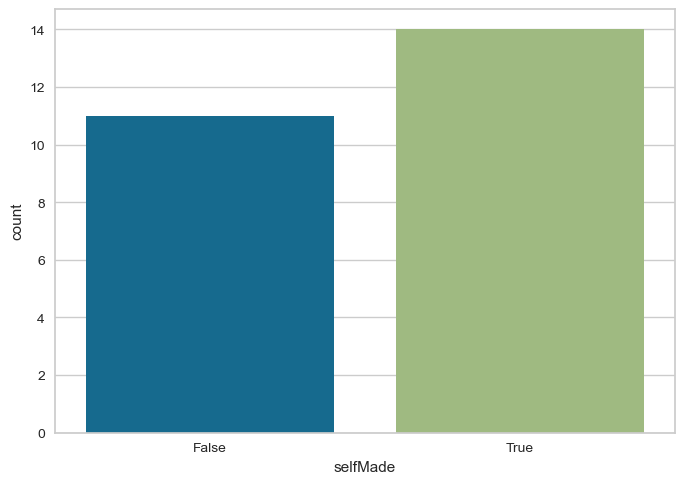

In [78]:
sns.countplot(x=tr['selfMade'])

<Axes: xlabel='gender', ylabel='count'>

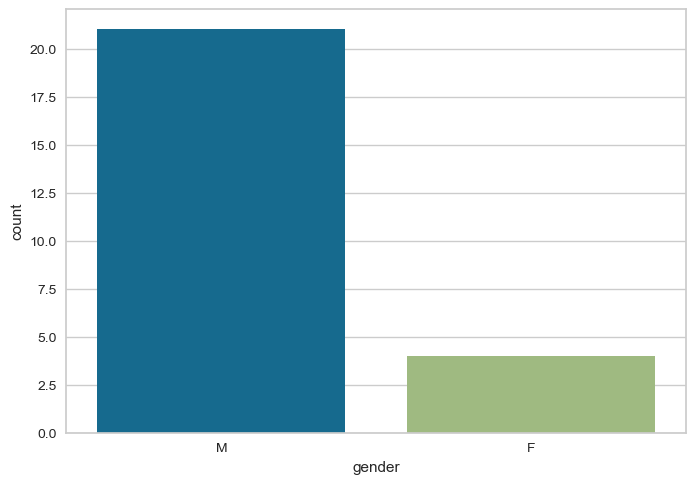

In [79]:
sns.countplot(x=tr['gender']) 

In [104]:
df = pd.read_csv('Billionaires.csv')

In [110]:
import pandas as pd
from datetime import datetime

# birthDate sütununu datetime tipine dönüştürme
df['birthDate'] = pd.to_datetime(df['birthDate'], format='%m/%d/%Y %H:%M')

# Şu anki tarihi belirleme
current_date = datetime(2024, 7, 7)

# Yaşı hesaplama fonksiyonu
def calculate_age(birthDate):
    if pd.isna(birthDate):
        return None
    return current_date.year - birthDate.year - ((current_date.month, current_date.day) < (birthDate.month, birthDate.day))

# age sütunundaki NaN değerleri birthDate'e göre doldurma
df['age'] = df['age'].fillna(df['birthDate'].apply(calculate_age))

# İlk birkaç satırı gösterme
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,1949-03-05,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,1971-06-28,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1964-01-12,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,1944-08-17,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,1930-08-30,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [139]:
# Boş sütunları doldurma fonksiyonu
def fill_na_with_group_mean(df, group_col, fill_col):
    df[fill_col] = df.groupby(group_col)[fill_col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))
    return df

# Doldurulacak sütunlar
columns_to_fill = [
    'cpi_country', 
    'cpi_change_country', 
    'gross_tertiary_education_enrollment', 
    'gross_primary_education_enrollment_country', 
    'life_expectancy_country', 
    'tax_revenue_country_country', 
    'total_tax_rate_country', 
    'population_country'
]

# Her bir sütunu country grubuna göre doldurma
for col in columns_to_fill:
    df = fill_na_with_group_mean(df, 'country', col)

In [140]:
df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             64
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [134]:
df['age'] = df['age'].fillna(2024 - df['birthYear'])

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [237]:
#finalWorth - age - cpi_country - cpi_change_country - life_expectancy_country - gross_tertiary_education_enrollment - gross_primary_education_enrollment_country - tax_revenue_country_country - total_tax_rate_country - population_country
x = df[['finalWorth', 'age',  'category', 'country', 'industries' , 'gross_tertiary_education_enrollment', 'life_expectancy_country']]
x['country'].fillna(x['country'].mode()[0], inplace=True)
x = pd.get_dummies(x, drop_first=True)
x['age'].fillna(df['age'].mean(), inplace=True)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x[['gross_tertiary_education_enrollment', 'life_expectancy_country']] = imputer.fit_transform(x[['gross_tertiary_education_enrollment', 'life_expectancy_country']])

x.isnull().sum()

finalWorth                             0
age                                    0
gross_tertiary_education_enrollment    0
life_expectancy_country                0
category_Construction & Engineering    0
                                      ..
industries_Real Estate                 0
industries_Service                     0
industries_Sports                      0
industries_Technology                  0
industries_Telecom                     0
Length: 115, dtype: int64

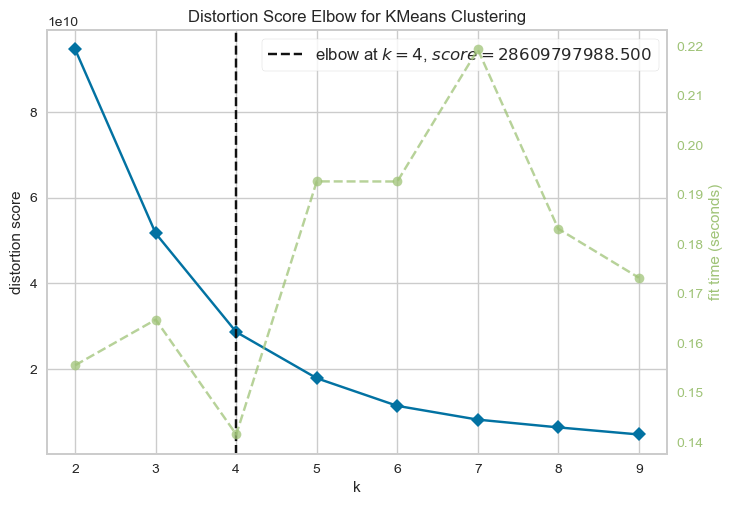

In [238]:
km = KMeans()
vis = KElbowVisualizer(km, k=(2, 10))
vis.fit(x)
vis.show();

In [239]:
model = KMeans(n_clusters=4)
model = model.fit(x)
pred = model.predict(x)
x['Cluster'] = pred 

In [219]:
x.head().T

,0,1,2,3,4
finalWorth,211000,180000,114000,107000,106000
age,74.0,51.0,59.0,78.0,92.0
rank,1,2,3,4,5
country_Andorra,False,False,False,False,False
country_Argentina,False,False,False,False,False
...,...,...,...,...,...
category_Service,False,False,False,False,False
category_Sports,False,False,False,False,False
category_Technology,False,False,True,True,False
category_Telecom,False,False,False,False,False


In [230]:
pred

array([3, 3, 1, ..., 0, 0, 0], dtype=int32)

In [240]:
silhouette_score(x, pred)

0.8531590330747729

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000')])

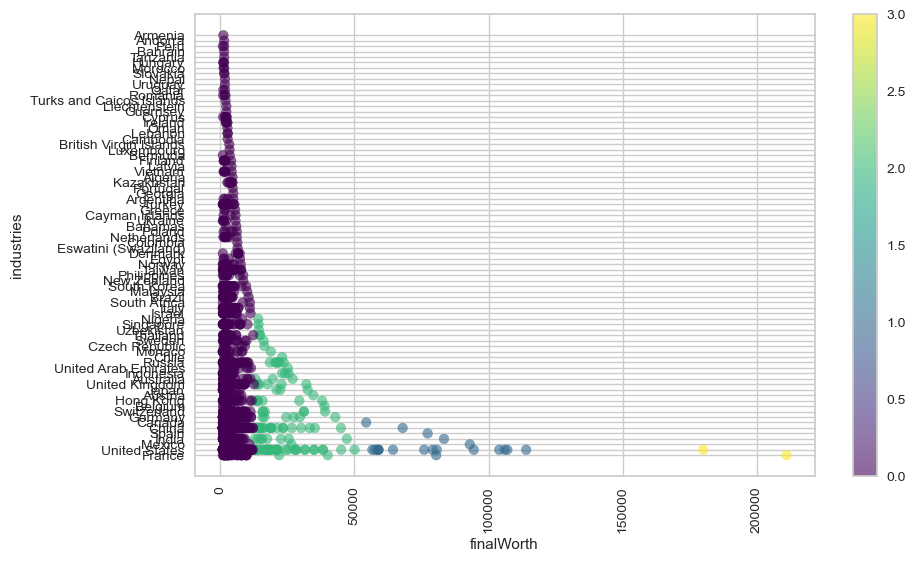

In [242]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x.finalWorth, df.country , c=pred, cmap='viridis', alpha=0.6)
plt.colorbar()
plt.xlabel('finalWorth')
plt.ylabel('industries')
plt.xticks(rotation=90)